### In-vitro data

In [24]:
from pathlib import Path
import spikeinterface.full as si

%matplotlib widget

In [25]:
dataset_folder = Path("/hdd1/data/HT-Workshop-Milan/")

In [26]:
recording = si.read_biocam(dataset_folder / "human_ngn2_100K_c_55D.brw")

In [27]:
recording

BiocamRecordingExtractor: 4096 channels - 10103.075195 Hz - 1 segments - 1,211,049 samples 
                          119.87s (2.00 minutes) - uint16 dtype - 9.24 GiB
  file_path: /hdd1/data/HT-Workshop-Milan/human_ngn2_100K_c_55D.brw

In [28]:
recording = si.unsigned_to_signed(recording, bit_depth=12)

In [29]:
recording

UnsignedToSignedRecording: 4096 channels - 10103.075195 Hz - 1 segments - 1,211,049 samples 
                           119.87s (2.00 minutes) - int16 dtype - 9.24 GiB

In [30]:
recording_processed = si.bandpass_filter(recording, freq_max=5000)
recording_processed = si.common_reference(recording_processed)

In [31]:
from spikeinterface.sortingcomponents.peak_detection import detect_peaks
from spikeinterface.sortingcomponents.peak_localization import localize_peaks

In [32]:
si.set_global_job_kwargs(n_jobs=0.8, chunk_duration="0.5s")

In [33]:
peaks = detect_peaks(recording_processed)

noise_level (workers: 20 processes):   0%|          | 0/20 [00:00<?, ?it/s]

detect peaks using locally_exclusive (workers: 25 processes):   0%|          | 0/240 [00:00<?, ?it/s]

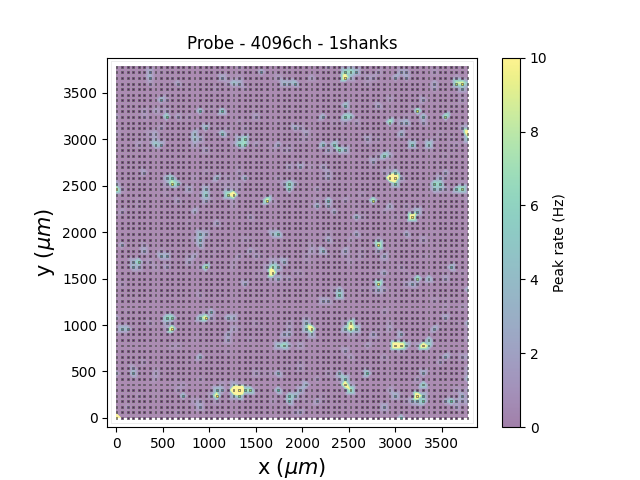

In [40]:
si.plot_peak_activity(recording, peaks, color_range=[0, 10])

In [ ]:
sorting_HS = si.run_sorter("herdingspikes", recording_processed, verbose=True, remove_existing_folder=True)

In [ ]:
sorting_HS

In [ ]:
analyzer = si.create_sorting_analyzer(sorting_HS, recording_processed)
analyzer.compute(["random_spikes", "templates", "unit_locations"])

In [ ]:
analyzer.compute(["correlograms", "template_similarity"])

In [ ]:
analyzer.compute(["spike_amplitudes"])

In [ ]:
# w = si.plot_peak_activity(recording_processed, peaks, bin_duration_s=None)

In [ ]:
si.plot_unit_templates(analyzer, backend="ipywidgets")

In [ ]:
si.plot_rasters(analyzer)

In [ ]:
potential_merges = si.compute_merge_unit_groups(analyzer, preset="x_contaminations")

In [ ]:
print(len(potential_merges))

In [ ]:
si.plot_potential_merges(analyzer, potential_merges, backend="ipywidgets")